<a href="https://colab.research.google.com/github/Rakshit-Sawarn-iitb/Drowsiness-Detection/blob/main/DrowsinessDetectionWithMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KAGGLE API LOADING**

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mrl-eye-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3027905%2F5206203%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240727%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240727T160203Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da993fb77c3d4695210b9715f6aa2e6adee64ad6ebdb5af1fee8732a608b1c4313f2f30330ae5570282f166b1866cdc6e7d4994ae5306f456331d3b017a6a9f2d687bcb8cd05a991d03209905236176a65bbb62fbe7b34eb6ed85051c5c70d16f0e744f69a2371ca9f92e8b4714149e733bdcd7c8d9e6d3056f68228ec67d73532ac6caa91131ec7a0806283c14d6ce6f45a368b0f4cf65427b174d12dd9d0467953c451461fa5d66bb3fff24fdffd40e0e2941a40717512121ac6ad95a139ccb82ffc1e610a95a4b15a4aaf314a43f17b0c0d6d044f63b5506cf8e123715604880778f2513a7830337481b30ed15921d83ad7a4a616dd4a97d9904924d9e85b5,drowsy-model/pytorch/drowsy-model/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F65850%2F78348%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240727%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240727T160203Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D63f2a308e23e57ddfd8a4105fb27e73dc8d9ead6ab9b848aef8d390c7efc8de844c36231a006b5d8911794af44c05f6bc40c22f7cbb20a897c26a50a4bc2841e6cf0fcc6d765eb65e31fdb363573ae696ec61fba9b1c3ad70165fedf63fddc2921956a62ba56aa90a5b1dc04f46824bc59af9e846039038bfd3b18724b9b1f989cea88ef882cb053246866e0270ec30c53821e2e7041ef33c761df910a655edfc8c9f239071b9cfb059f65422eca6d58298a22ff74f008b1234f939e021ebd15084e32647c889aec810b9b479bb3d4cf53698f05047d4444697b8d06e33dcd4ce45ad6a371da31f114e55556d72bca140e30de4b1f4461b6598f4920e09ddd16'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 346112303 bytes downloaded
Downloaded and uncompressed: mrl-eye-dataset
[==================================================] 77647048 bytes downloaded
Downloaded and uncompressed: drowsy-model/pytorch/drowsy-model/1
Data source import complete.


# **IMPORTS**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

In [3]:
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import torch.utils.data as utils

In [6]:
import random

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

In [8]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [9]:
from PIL import Image

In [10]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 3.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [11]:
import timm

In [12]:
import gc

# **DATASET LOADING**

In [13]:
close_dir = "/kaggle/input/mrl-eye-dataset/mrleyedataset/Close-Eyes"
open_dir = "/kaggle/input/mrl-eye-dataset/mrleyedataset/Open-Eyes"

In [14]:
close_paths = []
open_paths = []

In [15]:
for dirname, _, filenames in os.walk(open_dir):
        for filename in filenames:
            open_paths.append(os.path.join(dirname, filename))

In [16]:
for dirname, _, filenames in os.walk(close_dir):
        for filename in filenames:
            close_paths.append(os.path.join(dirname, filename))

In [17]:
print(len(open_paths))

42952


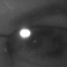

In [18]:
Image.open(open_paths[0])

In [19]:
print(len(close_paths))

41946


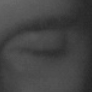

In [20]:
Image.open(close_paths[0])

So the dataset is pretty balanced so mostly there will be no issue of model biasness.

Now I will make a pandas dataframe where I will store these paths along with there labels. Labels that I thought are 0 for closed eye images and 1 for open eye images.

In [21]:
paths = []
labels = []

In [22]:
for i in range(len(open_paths)):
    paths.append(open_paths[i])
    labels.append(1)

In [23]:
for i in range(len(close_paths)):
    paths.append(close_paths[i])
    labels.append(0)

In [24]:
print(len(paths), len(labels))

84898 84898


Now there is one issue that our labels list contains 1's in the starting and 0's in the end this will create issue when we will do train-test split further as model will not get enough datapoints so to avoid that let's shuffle it once right now

In [25]:
combined = list(zip(paths, labels))

random.shuffle(combined)

paths[:], labels[:] = zip(*combined)

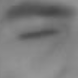

In [26]:
Image.open(paths[590])

In [27]:
labels[590]

0

Shuffled successfully

In [28]:
df = pd.DataFrame({'paths': paths, 'labels': labels})

In [29]:
df.to_csv('DrowsinessDataset.csv', index=False)

In [30]:
df.head()

,paths,labels
0,/kaggle/input/mrl-eye-dataset/mrleyedataset/Op...,1
1,/kaggle/input/mrl-eye-dataset/mrleyedataset/Cl...,0
2,/kaggle/input/mrl-eye-dataset/mrleyedataset/Cl...,0
3,/kaggle/input/mrl-eye-dataset/mrleyedataset/Op...,1
4,/kaggle/input/mrl-eye-dataset/mrleyedataset/Cl...,0


# **Data Processing and Pre-processing of images**

In [ ]:
image = cv.imread(df.iloc[590]['paths'])
if image is not None:
    height, width, channels = image.shape
    print(f"Image shape: Height={height}, Width={width}, Channels={channels}")
else:
    print("Error: Image not loaded correctly")

Image shape: Height=56, Width=56, Channels=3


In [31]:
class EyeDataset(Dataset):

    def __init__(self, data, augmentations=None):
        self.paths = data['paths']
        self.labels = data['labels']
        if augmentations is None:
          self.augmentations = transforms.Compose([transforms.ToTensor()])

        else:
          self.augmentations = augmentations

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index):
        label = self.labels[index]

        sample = Image.open(self.paths[index]).convert("RGB")
        sample = self.augmentations(sample)

        return sample,label

In [32]:
augmentations = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

In [33]:
eye_dataset = EyeDataset(df, augmentations)

In [34]:
sample, label = eye_dataset[90]

In [35]:
print(sample.shape)

torch.Size([3, 224, 224])


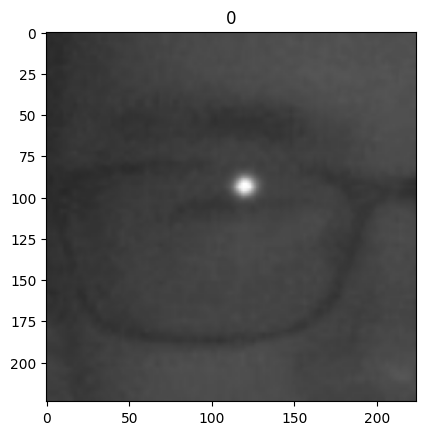

In [36]:
image = sample.numpy().transpose((1, 2, 0))

image = np.clip(image, 0, 1)

plt.imshow(image)
plt.title(label)
plt.show()

Wooho the dataset is ready!! Time to split it into training and testing datasets and create dataloaders!!

In [37]:
train_indices, testing_indices = train_test_split(range(len(eye_dataset)), test_size=0.2, random_state=42)

In [38]:
train_dataset = utils.Subset(eye_dataset, train_indices)
testing_dataset = utils.Subset(eye_dataset, testing_indices)

In [39]:
print(f"Length of training dataset:{len(train_dataset)}")
print(f"Length of testing dataset:{len(testing_dataset)}")

Length of training dataset:67918
Length of testing dataset:16980


In [40]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=32, num_workers=0)
test_loader = DataLoader(testing_dataset, shuffle=False, batch_size=32, num_workers=0)

# **MODEL CREATION**

I am using the pre-trained Xception model for this task. Using pre-trained model will help us leverage the advantages of transfer learning

In [41]:
model = timm.create_model("xception", pretrained=True)

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth" to /root/.cache/torch/hub/checkpoints/xception-43020ad28.pth


In [42]:
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, 2)

In [43]:
print(model)

Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

# **TRAINING**

In [44]:
class Config:
    learning_rate = 1e-4
    epochs = 10

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [46]:
class Trainer:
    def __init__(self, model, dataloaders, Config, device):
        self.device = device
        self.Config = Config
        self.model = model.to(self.device)
        self.train, self.test = dataloaders
        self.optim = torch.optim.Adam(self.model.parameters(), lr=self.Config.learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()

    def accuracy(self, outputs, labels):
        _, preds = torch.max(outputs, 1)
        return (preds == labels).sum().item() / labels.shape[0]

    def train_one_epoch(self):
        running_loss = 0
        running_acc = 0

        for X, y in self.train:
            X = X.to(self.device, dtype=torch.float)
            y = y.to(self.device, dtype=torch.long)

            self.optim.zero_grad()
            outputs = self.model(X)

            loss = self.loss_fn(outputs, y)
            loss.backward()
            self.optim.step()

            running_loss += loss.item()
            running_acc += self.accuracy(outputs, y)

            del X
            del y
            gc.collect()
            torch.cuda.empty_cache()

        train_loss = running_loss / len(self.train)
        train_acc = running_acc / len(self.train)

        return train_loss, train_acc

    def fit(self):
        losses = []
        accuracies = []


        for epoch in range(self.Config.epochs):
            self.model.train()
            train_loss, train_acc = self.train_one_epoch()
            losses.append(train_loss)
            accuracies.append(train_acc)
            print(f"EPOCH {epoch+1}/{self.Config.epochs}")
            print(f"Training Loss: {train_loss} | Training Accuracy: {train_acc}\n\n")

    @torch.no_grad()
    def inference(self):
        self.model.eval()
        running_acc = 0

        for X, y in self.test:
            X = X.to(self.device, dtype=torch.float)
            y = y.to(self.device, dtype=torch.long)
            outputs = self.model(X)
            running_acc += self.accuracy(outputs, y)

            del X
            del y
            gc.collect()
            torch.cuda.empty_cache()

        accuracy = (running_acc / len(self.test)) * 100
        return accuracy

    def predict(self, input_image):
        self.model.eval()
        input_image = input_image.to(self.device, torch.float)
        output = self.model(input_image)

        _, predicted_class = torch.max(output, 1)
        return predicted_class.item()

In [ ]:
trainer = Trainer(model, (train_loader, test_loader), Config, device)
trainer.fit()

EPOCH 1/10
Training Loss: 0.03877831992018881 | Training Accuracy: 0.9863842439943477


EPOCH 2/10
Training Loss: 0.02402715791904518 | Training Accuracy: 0.9913595148374941


EPOCH 3/10
Training Loss: 0.017548402169506847 | Training Accuracy: 0.9936116344795102


EPOCH 4/10
Training Loss: 0.01280322120660417 | Training Accuracy: 0.9954516015073009


EPOCH 5/10
Training Loss: 0.008814311389534963 | Training Accuracy: 0.9967763777673104




KeyboardInterrupt: 

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Drowsymodel.pth')
print("Model saved successfully!!")

Model saved successfully!!


# **TESTING**

In [47]:
model.load_state_dict(torch.load('/kaggle/input/drowsy-model/pytorch/drowsy-model/1/Drowsymodel.pth',map_location=torch.device('cpu')))
print("Model loaded successfully!!")

Model loaded successfully!!


In [48]:
trainer = Trainer(model, (train_loader, test_loader), Config, device)

In [49]:
trainer.inference()

99.7316384180791

In [50]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

@torch.no_grad()
def calculate_test_metrics(model, test_loader, device, classes):
    model.eval()
    y_true = []
    y_pred = []
    y_pred_proba = []

    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_pred_proba.append(torch.softmax(outputs, dim=1).cpu().numpy())  # Append instead of extend

        del inputs, labels
        torch.cuda.empty_cache()

    y_pred_proba = np.concatenate(y_pred_proba, axis=0)  # Convert list of arrays to a single numpy array

    print("Classification Report:")
    print(classification_report(y_true, np.argmax(y_pred_proba, axis=1), target_names=classes))

    print("Confusion Matrix:")
    plot_confusion_matrix(y_true, np.argmax(y_pred_proba, axis=1), classes)

    print("ROC Curve:")
    plot_roc_curve(y_true, y_pred_proba, len(classes))

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, n_classes):
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Convert y_true to binary matrix
    y_true_binary = np.eye(n_classes)[y_true]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [51]:
model.eval()

Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

In [52]:
label_mapping = {'Closed': 0, 'Open': 1}

# Extract class labels from the keys of label_mapping
classes = list(label_mapping.keys())

print(classes)  # Just to verify the classes

['Closed', 'Open']


Classification Report:
              precision    recall  f1-score   support

      Closed       1.00      1.00      1.00      8346
        Open       1.00      1.00      1.00      8634

    accuracy                           1.00     16980
   macro avg       1.00      1.00      1.00     16980
weighted avg       1.00      1.00      1.00     16980

Confusion Matrix:


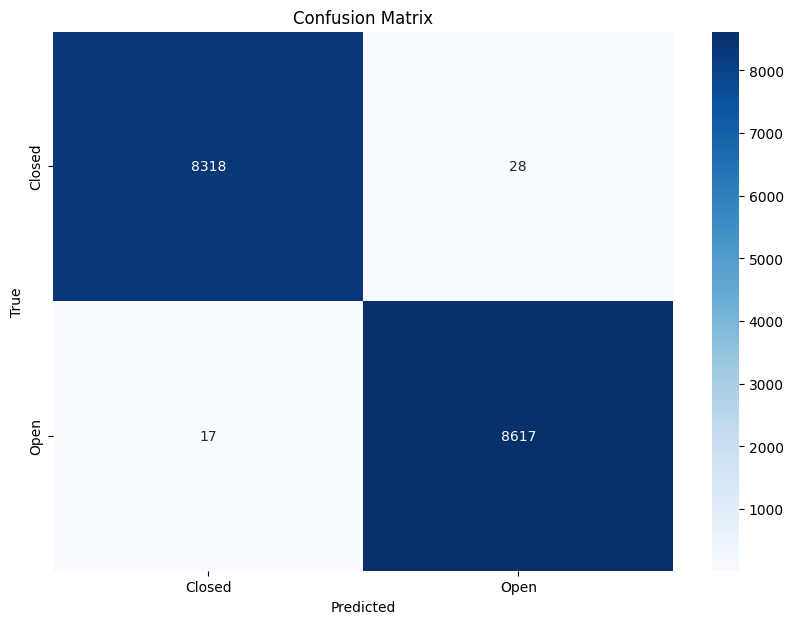

ROC Curve:


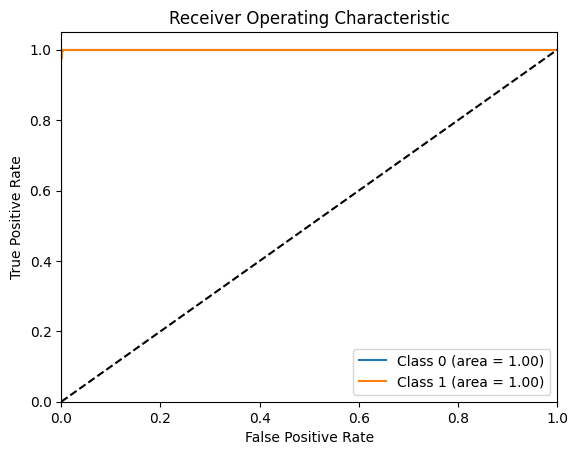

In [53]:
calculate_test_metrics(model, test_loader, device, classes)

In [ ]:
image_path = '/kaggle/input/mrl-eye-dataset/mrleyedataset/Close-Eyes/s0001_00004_0_0_0_0_0_01.png'
image = Image.open(image_path).convert("RGB")
input_data = augmentations(image).unsqueeze(0).to(device)

In [ ]:
with torch.no_grad():
    output = model(input_data)

probabilities = torch.softmax(output, dim=1)
predicted_class = torch.argmax(probabilities, dim=1).item()

In [ ]:
print(predicted_class)

0


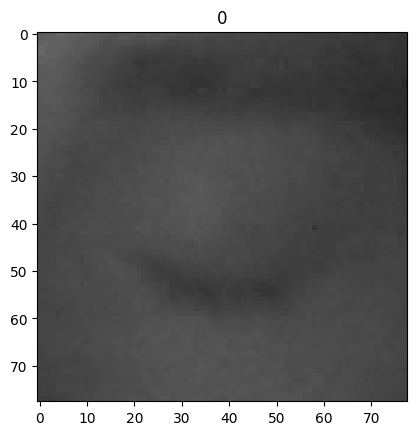

In [ ]:
plt.imshow(image, cmap='gray')
plt.title(label)
plt.show()